In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class point:
    def __init__(self,x,y):
        self.x = x
        self.y = y

In [39]:
class rotated:
    def __init__(self, p0,p1,p2):
        if type(p0) == tuple:
            self.p0 = point(p0[0],p0[1])
        elif isinstance(p0, np.ndarray):
            self.p0 = point(p0[0], p0[1])
        else:
            self.p0 = p0
            
        if type(p1) == tuple:
            self.p1 = point(p1[0],p1[1])
        elif isinstance(p1, np.ndarray):
            self.p1 = point(p1[0], p1[1])
        else:
            self.p1 = p1
            
        if type(p2) == tuple:
            self.p2 = point(p2[0],p2[1])
        elif isinstance(p2, np.ndarray):
            self.p2 = point(p2[0], p2[1])
        else:
            self.p2 = p2
    
    def cross_prod(self):
        return (self.p1.x-self.p0.x)*(self.p2.y-self.p0.y)-(self.p1.y-self.p0.y)*(self.p2.x-self.p0.x)
        
    def rot(self, verbose = True):
        rot = self.cross_prod()
        if verbose:
            if rot > 0:
                print(f'{p1} rotado en sentido horario respecto a {p2}, con {p0} como origen')
            elif rot < 0:
                print(f'{p1} rotado en sentido anti-horario respecto a {p2}, con {p0} como origen')
            else:
                print(f'{p1} colineal a {p2}, con {p0} como origen')
        return rot
    
    def plot(self):
        plt.figure('Rotation')
        plt.arrow(self.p0.x,self.p0.y, self.p1.x-self.p0.x, self.p1.y-self.p0.y, head_width=0.05, head_length=0.05, label = p1)
        plt.arrow(self.p0.x,self.p0.y, self.p2.x-self.p0.x, self.p2.y-self.p0.y, head_width=0.05, head_length=0.05, color = 'red', label = p2)
        plt.legend()
        
class turned:
    def __init__(self, p0,p1,p2):
        if type(p0) == tuple:
            self.p0 = point(p0[0],p0[1])
        elif isinstance(p0, np.ndarray):
            self.p0 = point(p0[0], p0[1])
        else:
            self.p0 = p0
            
        if type(p1) == tuple:
            self.p1 = point(p1[0],p1[1])
        elif isinstance(p1, np.ndarray):
            self.p1 = point(p1[0], p1[1])
        else:
            self.p1 = p1
            
        if type(p2) == tuple:
            self.p2 = point(p2[0],p2[1])
        elif isinstance(p2, np.ndarray):
            self.p2 = point(p2[0], p2[1])
        else:
            self.p2 = p2
    
    def cross_prod(self):
        return (self.p1.x-self.p0.x)*(self.p2.y-self.p0.y)-(self.p1.y-self.p0.y)*(self.p2.x-self.p0.x)
        
    def turn(self, verbose = True):
        rot = self.cross_prod()
        if verbose:
            if rot > 0:
                print(f'En {p1} se hace un giro en sentido anti-horario')
            elif rot < 0:
                print(f'En {p1} se hace un giro en sentido horario')
            else:
                print(f'En {p1} no se gira')
        return rot
    
    def plot(self):
        plt.figure('Turn')
        plt.arrow(self.p0.x,self.p0.y, self.p1.x-self.p0.x, self.p1.y-self.p0.y, head_width=0.05, head_length=0.05, label = p1)
        plt.arrow(self.p1.x,self.p1.y, self.p2.x-self.p1.x, self.p2.y-self.p1.y, head_width=0.05, head_length=0.05, color = 'red', label = p2)
        plt.legend()

In [40]:
class inter:
    def __init__(self, p0, p1, p2, p3):
        self.p0 = point(p0[0],p0[1])
        self.p1 = point(p1[0],p1[1])
        self.p2 = point(p2[0],p2[1])
        self.p3 = point(p3[0],p3[1])
        
    def exist(self):
        d0 = rotated(p2,p0,p3).rot(verbose = False)
        d1 = rotated(p2,p1,p3).rot(verbose = False)
        d2 = rotated(p0,p2,p1).rot(verbose = False)
        d3 = rotated(p0,p3,p1).rot(verbose = False)
        return (d0*d1 == -1) and (d2*d3 == -1)
    
    def find(self):
        [alpha, beta] = np.matmul(\
        np.linalg.inv(\
        np.matrix([\
        [self.p0.x-self.p1.x, self.p3.x-self.p2.x],[self.p0.y-self.p1.y, self.p3.y-self.p2.y]]))\
        ,np.matrix([[self.p3.x-self.p1.x], [self.p3.y-self.p1.y]]))
        return float(alpha),float(beta)

In [80]:
class points:
    def __init__(self,array):
        self.array = np.array([[p[0], p[1], 0] for p in array])
        self.ordered = False
    
    def order(self):
        self.array = self.array[np.lexsort((self.array[:, 1], self.array[:, 0]))]
        self.ordered = True
        
    def pend(self):
        if ~self.ordered:
            self.order()
        for ipoint in range(len(self.array)):
            if ipoint != 0:
                self.array[ipoint][2] = (self.array[ipoint][1]-self.array[0][1])/(self.array[ipoint][0]-self.array[0][0])
            else:
                self.array[ipoint][2] = -np.inf
        self.array = self.array[self.array[:,2].argsort()]
        
    def hull(self):
        self.pend()
        s = [self.array[0], self.array[1], self.array[2]]
        for ipoint in range(3, len(self.array)):
            while len(s) >= 2 and turned(s[-2], s[-1], self.array[ipoint]).cross_prod() <= 0:
                s.pop()
            s.append(self.array[ipoint])
        s.append(s[0])
        return np.array(s)
                    
            
    
    
        

(1, 0) rotado en sentido horario respecto a (0, 1), con (0, 0) como origen
1


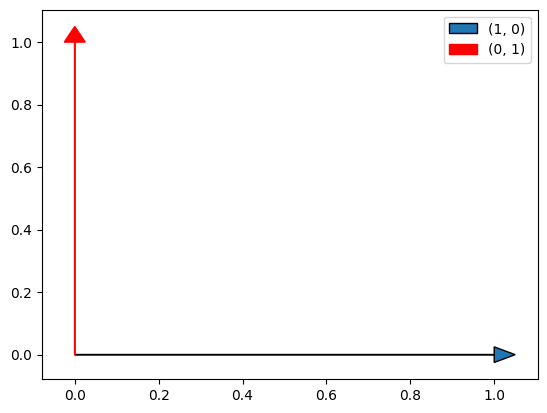

In [66]:
p0 = (0,0)
p1 = (1,0)
p2 = (0,1)

ejer = rotated(p0,p1,p2)
print(ejer.rot())
ejer.plot()

En (1, 0) se hace un giro en sentido anti-horario
1


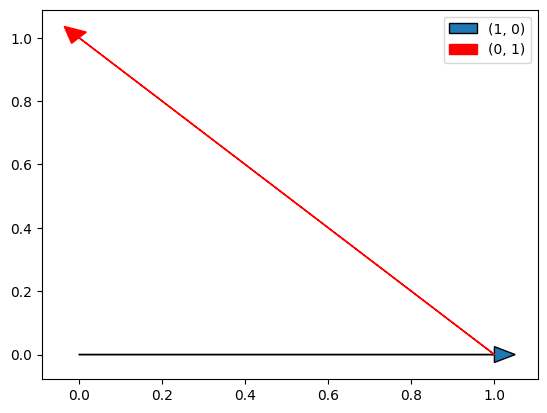

In [67]:
ejer = turned(p0,p1,p2)
print(ejer.turn())
ejer.plot()

In [68]:
p0 = (0,0)
p1 = (1,1)
p2 = (1,0)
p3 = (0,1)

ejer = inter(p0,p1,p2,p3)
ejer.exist()
ejer.find()

(0.5, 0.5)

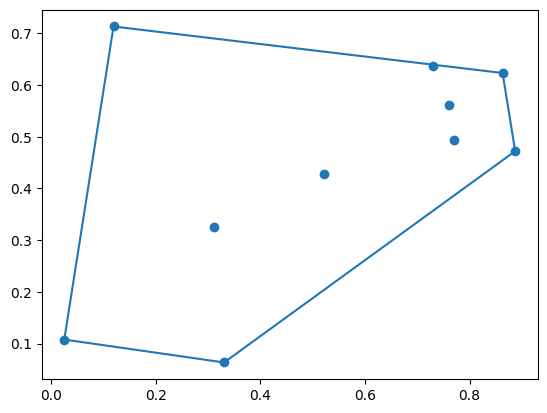

In [85]:
ps = np.random.rand(10,2)
pa = points(ps)
plt.scatter(ps[:,0], ps[:,1])
h = pa.hull()
xcor = h[:,0]
ycor = h[:,1]
plt.plot(xcor, ycor)